# <u> NACEP </u>
## 2015-16 CRDC
## AP v. DE Flag Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected = True)

%matplotlib inline
sns.set_style('whitegrid')
plt.rc('axes', titlesize = 14, titleweight = 'bold', labelweight = 'bold')

In [2]:
hs = pd.read_csv('../filtered_data/04_filter_final.csv', dtype = {'LEAID':np.object})

In [3]:
hs.columns.values

array(['COMBOKEY', 'SCH_NAME', 'GSHI', 'GSLO', 'JJ', 'LAT1516', 'LEAID',
       'LEA_NAME', 'LEA_STATE', 'LEA_STATE_NAME', 'LEVEL', 'LOCALE15',
       'LON1516', 'NMCNTY15', 'SCHID', 'SCH_APENR_AM_F', 'SCH_APENR_AM_M',
       'SCH_APENR_AS_F', 'SCH_APENR_AS_M', 'SCH_APENR_BL_F',
       'SCH_APENR_BL_M', 'SCH_APENR_HI_F', 'SCH_APENR_HI_M',
       'SCH_APENR_HP_F', 'SCH_APENR_HP_M', 'SCH_APENR_IDEA_F',
       'SCH_APENR_IDEA_M', 'SCH_APENR_IND', 'SCH_APENR_LEP_F',
       'SCH_APENR_LEP_M', 'SCH_APENR_TR_F', 'SCH_APENR_TR_M',
       'SCH_APENR_WH_F', 'SCH_APENR_WH_M', 'SCH_DUALENR_AM_F',
       'SCH_DUALENR_AM_M', 'SCH_DUALENR_AS_F', 'SCH_DUALENR_AS_M',
       'SCH_DUALENR_BL_F', 'SCH_DUALENR_BL_M', 'SCH_DUALENR_HI_F',
       'SCH_DUALENR_HI_M', 'SCH_DUALENR_HP_F', 'SCH_DUALENR_HP_M',
       'SCH_DUALENR_IDEA_F', 'SCH_DUALENR_IDEA_M', 'SCH_DUALENR_LEP_F',
       'SCH_DUALENR_LEP_M', 'SCH_DUALENR_TR_F', 'SCH_DUALENR_TR_M',
       'SCH_DUALENR_WH_F', 'SCH_DUALENR_WH_M', 'SCH_DUAL_IND',
    

# I. Overall Breakdowns

<div class = 'alert alert-cell alert-info'>**All DE**</div>

In [4]:
de_breakdown = hs.groupby(['SCH_DUAL_IND'])['LEAID'].count()
print(de_breakdown)
print("")
de_pct = round(de_breakdown.iloc[1] / (de_breakdown.iloc[0] + de_breakdown.iloc[1]), 3)
print(str(de_pct) + " percent of schools in this dataset reported that they offered dual enrollment in 2013-2014.")

SCH_DUAL_IND
No      5337
Yes    13330
Name: LEAID, dtype: int64

0.714 percent of schools in this dataset reported that they offered dual enrollment in 2013-2014.


<div class = 'alert alert-cell alert-info'>**All AP**</div>

In [5]:
ap_breakdown = hs.groupby(['SCH_APENR_IND'])['LEAID'].count()
print(ap_breakdown)
print("")
ap_pct = round(ap_breakdown.iloc[1] / (ap_breakdown.iloc[0] + ap_breakdown.iloc[1]), 3)
print(str(ap_pct) + " percent of schools in this dataset reported that they offered AP in 2013-2014.")

SCH_APENR_IND
No      5911
Yes    12756
Name: LEAID, dtype: int64

0.683 percent of schools in this dataset reported that they offered AP in 2013-2014.


<div class = 'alert alert-cell alert-info'>**Number of DE-Only**</div>

In [6]:
de_only = len(hs[(hs['SCH_DUAL_IND'] == 'Yes') & (hs['SCH_APENR_IND'] == 'No')].index)
de_only

3872

<div class = 'alert alert-cell alert-info'>**Number of AP-Only**</div>

In [7]:
ap_only = len(hs[(hs['SCH_DUAL_IND'] == 'No') & (hs['SCH_APENR_IND'] == 'Yes')].index)
ap_only

3298

<div class = 'alert alert-cell alert-info'>** Number offering both **</div>

In [8]:
de_and_ap = len(hs[((hs['SCH_DUAL_IND'] == 'Yes') & (hs['SCH_APENR_IND'] == 'Yes'))].index)
de_and_ap

9458

<div class = 'alert alert-cell alert-info'>**Number offering Neither**</div>

In [9]:
neither = len(hs[(hs['SCH_DUAL_IND'] == 'No') & (hs['SCH_APENR_IND'] == 'No')].index)
neither

2039

<div class='alert alert-cell alert-danger'>**Visualization**</div>

In [10]:
ap_de_breakdown = pd.DataFrame([de_only, ap_only, de_and_ap, neither], index = ['DE Only', 'AP Only', 'Both', 'Neither'], columns=['Number of Schools'])

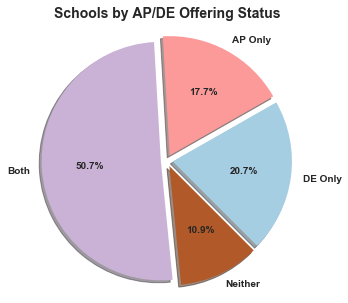

In [11]:
with plt.rc_context({'lines.linewidth': 5, 'font.weight':'bold'}):
    ap_de_breakdown.plot.pie(y='Number of Schools',autopct='%1.1f%%', 
                            startangle = -45, shadow = True, explode = [.05 for i in range(4)],
                            colormap='Paired', figsize = (5,5))
    plt.title('Schools by AP/DE Offering Status')
    plt.legend([])
    plt.ylabel('')
    plt.xticks(fontdict={'fontweight':'bold'})
    plt.axis('equal')

# II. By State

<div class = 'alert alert-cell alert-info'>**DE**</div>

In [12]:
de_by_state = hs.groupby(['LEA_STATE', 'SCH_DUAL_IND'])['LEAID'].count().unstack().reset_index()
de_by_state['Total Schools'] = (de_by_state['Yes'] + de_by_state['No'])
de_by_state['pct'] = round(de_by_state['Yes'] / (de_by_state['Yes'] + de_by_state['No']), 2)

In [13]:
display(de_by_state.drop(['No'], axis = 1).sort_values('pct', ascending=False))
de_by_state_pcts = de_by_state[['LEA_STATE', 'pct']]
%store de_by_state_pcts

SCH_DUAL_IND,LEA_STATE,Yes,Total Schools,pct
12,IA,321,330,0.97
40,SC,212,229,0.93
11,HI,57,63,0.90
10,GA,379,421,0.90
9,FL,504,566,0.89
32,NM,148,166,0.89
46,VT,57,64,0.89
45,VA,287,321,0.89
13,ID,133,152,0.88
24,MO,481,549,0.88


Stored 'de_by_state_pcts' (DataFrame)


In [14]:
de_data = dict(type = 'choropleth',
            locations = de_by_state['LEA_STATE'],
            locationmode = 'USA-states',
            colorscale = [[0.0, 'rgb(255,255,255)'], [.2, 'rgb(255,221,221)'], [.4, 'rgb(255, 200, 200)'], [0.8, 'rgb(255, 50, 50)'], [1.0, 'rgb(180,0,0)']],
            reversescale = False,
            z = de_by_state['pct'])

In [15]:
de_layout = dict(title = '2015-2016 DE-Offered Percentages',
              geo = {'scope':'usa'})

In [16]:
de_choromap = go.Figure(data = [de_data], layout = de_layout)

In [17]:
iplot(de_choromap)
# iplot(de_choromap, image = 'png', filename='./Visualizations/by_state_de_choropleth')

<div class = 'alert alert-cell alert-warning'>**AP**</div>

In [18]:
ap_by_state = hs.groupby(['LEA_STATE', 'SCH_APENR_IND'])['LEAID'].count().unstack().reset_index()
"""Fill in Missing Values with 0"""
ap_by_state = ap_by_state.fillna(0)
ap_by_state[['Yes', 'No']] = ap_by_state[['Yes', 'No']].astype(int)
ap_by_state['Total Schools'] = (ap_by_state['Yes'] + ap_by_state['No'])
ap_by_state['pct'] = round(ap_by_state['Yes'] / (ap_by_state['Yes'] + ap_by_state['No']), 2)

In [19]:
display(ap_by_state.drop(['No'], axis = 1).sort_values('pct', ascending=False))
ap_by_state_pcts = ap_by_state[['LEA_STATE', 'pct']]
%store ap_by_state_pcts

SCH_APENR_IND,LEA_STATE,Yes,Total Schools,pct
7,DC,28,29,0.97
45,VA,299,321,0.93
2,AR,255,273,0.93
31,NJ,377,410,0.92
20,MD,200,218,0.92
49,WV,109,121,0.90
10,GA,376,421,0.89
15,IN,328,378,0.87
17,KY,202,232,0.87
19,MA,295,349,0.85


Stored 'ap_by_state_pcts' (DataFrame)


In [20]:
ap_data = dict(type = 'choropleth',
            locations = ap_by_state['LEA_STATE'],
            locationmode = 'USA-states',
            colorscale = [[0.0, 'rgb(255,255,255)'], [.2, 'rgb(255,221,221)'], [.4, 'rgb(255, 200, 200)'], [0.8, 'rgb(255, 50, 50)'], [1.0, 'rgb(180,0,0)']],
            reversescale = False,
            z = ap_by_state['pct'])

In [21]:
ap_layout = dict(title = '2015-2016 AP-Offered Percentages',
              geo = {'scope':'usa'})

In [22]:
ap_choromap = go.Figure(data = [ap_data], layout = ap_layout)

In [23]:
iplot(ap_choromap)
# iplot(ap_choromap, image = 'png', filename='./Visualizations/by_state_ap_choropleth')

# III. By Size
(Based on Total Enrollment of School)

<div class = 'alert alert-cell alert-danger'>**Create a Size-of-School Classifier**</div>

In [24]:
hs['total_enrollment'] = hs['TOT_ENR_M'] + hs['TOT_ENR_F']

In [25]:
def school_sizer(enroll):
    if enroll < 100:
        return 1
    elif 100 <= enroll < 500:
        return 2
    elif 500 <= enroll < 1200:
        return 3
    return 4

In [26]:
hs['size_group'] = hs['total_enrollment'].apply(lambda x: school_sizer(x))

Text(0.5,0,'')

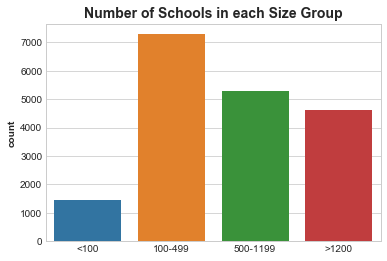

In [27]:
sns.countplot(x = 'size_group', data = hs)
plt.title('Number of Schools in each Size Group')
plt.xticks([0,1,2,3], ['<100', '100-499', '500-1199', '>1200'])
plt.xlabel('')

<div class = 'alert alert-cell alert-info'>**DE**</div>

In [28]:
hs_by_size = hs.groupby(['size_group', 'SCH_DUAL_IND'])['LEAID'].count().unstack().reset_index()
hs_by_size['Total Schools'] = (hs_by_size['Yes'] + hs_by_size['No'])
hs_by_size['pct_de'] = round(hs_by_size['Yes'] / (hs_by_size['Yes'] + hs_by_size['No']), 2)
display(hs_by_size.drop(['No'], axis = 1))
%store hs_by_size

SCH_DUAL_IND,size_group,Yes,Total Schools,pct_de
0,1,709,1462,0.48
1,2,5198,7287,0.71
2,3,3912,5306,0.74
3,4,3511,4612,0.76


Stored 'hs_by_size' (DataFrame)


<div class = 'alert alert-cell alert-warning'>**AP**</div>

In [29]:
ap_by_size = hs.groupby(['size_group', 'SCH_APENR_IND'])['LEAID'].count().unstack().reset_index()
ap_by_size['Total Schools'] = (ap_by_size['Yes'] + ap_by_size['No'])
ap_by_size['pct_ap'] = round(ap_by_size['Yes'] / (ap_by_size['Yes'] + ap_by_size['No']), 2)
display(ap_by_size.drop(['No'], axis = 1))
%store ap_by_size

SCH_APENR_IND,size_group,Yes,Total Schools,pct_ap
0,1,176,1462,0.12
1,2,3584,7287,0.49
2,3,4508,5306,0.85
3,4,4488,4612,0.97


Stored 'ap_by_size' (DataFrame)


<div class = 'alert alert-cell alert-danger'>**Visualizations**</div>

(0, 1)

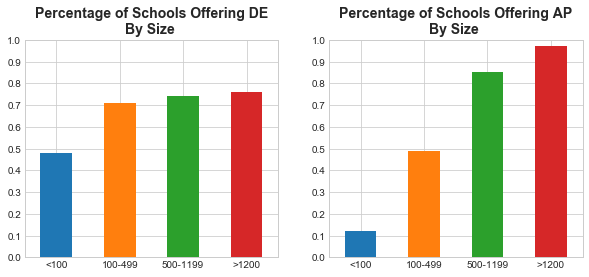

In [30]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (10,4))

plt.sca(ax1)
hs_by_size.plot.bar(x = 'size_group', y = 'pct_de', ax = ax1)
plt.xticks(rotation = 0)
plt.legend([])
plt.xlabel('')
plt.title('Percentage of Schools Offering DE\nBy Size ')
plt.yticks(np.arange(0,1.1,0.1))
plt.xticks([0,1,2,3], ['<100', '100-499', '500-1199', '>1200'])
plt.ylim([0,1])

plt.sca(ax2)
ap_by_size.plot.bar(x = 'size_group', y = 'pct_ap', ax=ax2)
plt.xticks(rotation = 0)
plt.legend([])
plt.xlabel('')
plt.title('Percentage of Schools Offering AP\nBy Size ')
plt.yticks(np.arange(0,1.1,0.1))
plt.xticks([0,1,2,3], ['<100', '100-499', '500-1199', '>1200'])
plt.ylim([0,1])

# IV. By Region

<div class = 'alert alert-cell alert-danger'>**Create a Region Classifer based on Region Accreditation**</div>

In [31]:
"""
1:  Middle States Commission on Higher Education - New York, New Jersey, Pennsylvania, Delaware, Maryland, the District of Columbia

2:  New England Association of Schools and Colleges - Connecticut, Maine, Massachusetts, New Hampshire, Rhode Island, and Vermont

3:  Higher Learning Commission - Arkansas, Arizona, Colorado, Iowa, Illinois, Indiana, Kansas, Michigan, Minnesota, Missouri, 
    North Dakota, Nebraska, New Mexico, Ohio, Oklahoma, South Dakota, Wisconsin, West Virginia, and Wyoming

4:  Northwest Commission on Colleges and Universities - Alaska, Idaho, Montana, Nevada, Oregon, Utah, and Washington

5:  Southern Association of Colleges and Schools - Alabama, Florida, Georgia, Kentucky, Louisiana, Mississippi, 
    North Carolina, South Carolina, Tennessee, Texas and Virginia

6:  Western Association of Schools and Colleges - California, Hawaii
"""

middle_states = "NY,NJ,PA,DE,MD,DC".split(',')
new_england = "CT,ME,MA,NH,RI,VT".split(',')
higher_learning_commission = "AR,AZ,CO,IA,IL,IN,KS,MI,MN,MO,ND,NE,NM,OH,OK,SD,WI,WV,WY".split(',')
northwest_commission = "AK,ID,MT,NV,OR,UT,WA".split(',')
southern_association = "AL,FL,GA,KY,LA,MS,NC,SC,TN,TX,VA".split(',')
western_association = "CA,HI".split(',')

In [32]:
def region_mapper(state):
    if state in middle_states:
        return "MSCHE"
    elif state in new_england:
        return "NEASC"
    elif state in higher_learning_commission:
        return "HLC"
    elif state in northwest_commission:
        return "NWCCU"
    elif state in southern_association:
        return "SACS"
    elif state in western_association:
        return "WASC"
    else:
        return "Messed Up"
    
hs['region_accred'] = hs['LEA_STATE'].apply(lambda x: region_mapper(x))

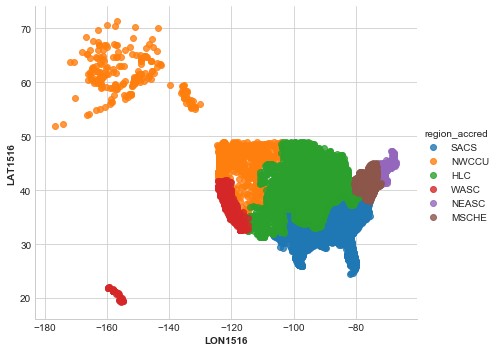

In [33]:
sns.lmplot(x = 'LON1516', y = 'LAT1516', data = hs, hue = 'region_accred', fit_reg = False, aspect = 1.2)
# plt.savefig(fname = './Visualizations/By_regionII_map_200.png', dpi = 200)

<div class = 'alert alert-cell alert-info'>**DE**</div>

In [34]:
de_by_region_accred = hs.groupby(['region_accred', 'SCH_DUAL_IND'])['LEA_STATE'].count().unstack('SCH_DUAL_IND').reset_index()
de_by_region_accred['Total Schools'] = (de_by_region_accred['Yes'] + de_by_region_accred['No'])
de_by_region_accred['pct_de'] = round(de_by_region_accred['Yes'] / (de_by_region_accred['Yes'] + de_by_region_accred['No']), 2)
display(de_by_region_accred.drop(['No'], axis = 1))

%store de_by_region_accred

SCH_DUAL_IND,region_accred,Yes,Total Schools,pct_de
0,HLC,5596,7156,0.78
1,MSCHE,1452,2590,0.56
2,NEASC,506,884,0.57
3,NWCCU,924,1468,0.63
4,SACS,4307,5074,0.85
5,WASC,545,1495,0.36


Stored 'de_by_region_accred' (DataFrame)


<div class = 'alert alert-cell alert-warning'>**AP**</div>

In [35]:
ap_by_region_accred = hs.groupby(['region_accred', 'SCH_APENR_IND'])['LEA_STATE'].count().unstack().reset_index()
ap_by_region_accred['Total Schools'] = (ap_by_region_accred['Yes'] + ap_by_region_accred['No'])
ap_by_region_accred['pct_ap'] = round(ap_by_region_accred['Yes'] / (ap_by_region_accred['Yes'] + ap_by_region_accred['No']), 2)
display(ap_by_region_accred.drop(['No'], axis = 1))

%store ap_by_region_accred

SCH_APENR_IND,region_accred,Yes,Total Schools,pct_ap
0,HLC,4085,7156,0.57
1,MSCHE,2133,2590,0.82
2,NEASC,736,884,0.83
3,NWCCU,765,1468,0.52
4,SACS,3832,5074,0.76
5,WASC,1205,1495,0.81


Stored 'ap_by_region_accred' (DataFrame)


<div class = 'alert alert-cell alert-danger'>**Visualizations**</div>


Text(0.5,0,'')

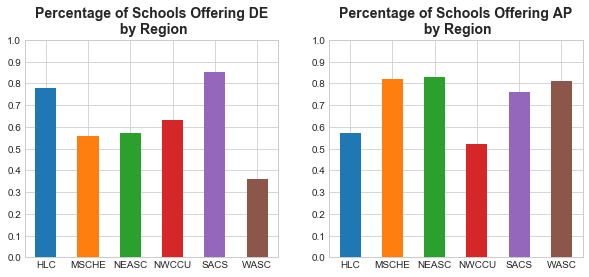

In [36]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (10,4))

plt.sca(ax1)
de_by_region_accred.plot.bar(x = 'region_accred', y = 'pct_de', ax=ax1)
plt.title('Percentage of Schools Offering DE\n by Region')
plt.xticks(rotation = 0)
plt.legend([])
plt.yticks(np.arange(0,1.1,0.1))
plt.ylim([0,1])
plt.xlabel('')

plt.sca(ax2)
ap_by_region_accred.plot.bar(x = 'region_accred', y = 'pct_ap', ax=ax2)
plt.title('Percentage of Schools Offering AP\n by Region')
plt.xticks(rotation = 0)
plt.legend([])
plt.yticks(np.arange(0,1.1,0.1))
plt.ylim([0,1])
plt.xlabel('')

# V. By Locale

<div class = 'alert alert-cell alert-danger'>**Creating a Locale Classifer**</div>

In [37]:
locale_map = {11: 'City', 12: 'City', 13: 'City', 14: 'City',
              21: 'Suburban', 22: 'Suburban', 23: 'Suburban', 24: 'Suburban',
              31: 'Town', 32: 'Town', 33: 'Town', 34: 'Town',
              41: 'Rural', 42: 'Rural', 43: 'Rural', 44: 'Rural'}

hs['locale_group'] = hs['LOCALE15'].map(locale_map)

<div class = 'alert alert-cell alert-info'>**DE**</div>

In [38]:
de_by_locale = hs.groupby(['locale_group', 'SCH_DUAL_IND'])['LEA_STATE'].count().unstack('SCH_DUAL_IND').reset_index()
de_by_locale['Total Schools'] = (de_by_locale['Yes'] + de_by_locale['No'])
de_by_locale['pct_de'] = round(de_by_locale['Yes'] / (de_by_locale['Yes'] + de_by_locale['No']), 2)
de_by_locale.drop(['No'], axis = 1)

SCH_DUAL_IND,locale_group,Yes,Total Schools,pct_de
0,City,2301,4109,0.56
1,Rural,5853,7438,0.79
2,Suburban,3126,4481,0.70
3,Town,2050,2639,0.78


<div class = 'alert alert-cell alert-warning'>**AP**</div>

In [39]:
ap_by_locale = hs.groupby(['locale_group', 'SCH_APENR_IND'])['LEA_STATE'].count().unstack().reset_index()
ap_by_locale['Total Schools'] = (ap_by_locale['Yes'] + ap_by_locale['No'])
ap_by_locale['pct_ap'] = round(ap_by_locale['Yes'] / (ap_by_locale['Yes'] + ap_by_locale['No']), 2)
ap_by_locale.drop(['No'], axis = 1)

SCH_APENR_IND,locale_group,Yes,Total Schools,pct_ap
0,City,3152,4109,0.77
1,Rural,3827,7438,0.51
2,Suburban,3925,4481,0.88
3,Town,1852,2639,0.70


<div class = 'alert alert-cell alert-danger'>**Visualizations**</div>

Text(0.5,0,'')

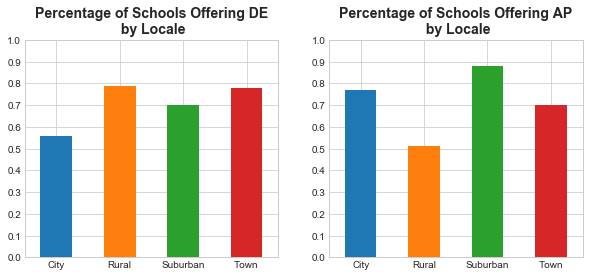

In [40]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (10,4))

plt.sca(ax1)
de_by_locale.plot.bar(x = 'locale_group', y = 'pct_de', ax=ax1)
plt.title('Percentage of Schools Offering DE\n by Locale')
plt.xticks(rotation = 0)
plt.legend([])
plt.yticks(np.arange(0,1.1,0.1))
plt.ylim([0,1])
plt.xlabel('')

plt.sca(ax2)
ap_by_locale.plot.bar(x = 'locale_group', y = 'pct_ap', ax=ax2)
plt.title('Percentage of Schools Offering AP\n by Locale')
plt.xticks(rotation = 0)
plt.legend([])
plt.yticks(np.arange(0,1.1,0.1))
plt.ylim([0,1])
plt.xlabel('')

# VI. By Charter Status

In [41]:
"""How many charter schools exist in the set?"""
hs.SCH_STATUS_CHARTER.value_counts()

No     16876
Yes     1791
Name: SCH_STATUS_CHARTER, dtype: int64

<div class = 'alert alert-cell alert-info'>**DE**</div>

In [42]:
de_by_charter = hs.groupby(['SCH_STATUS_CHARTER', 'SCH_DUAL_IND'])['LEAID'].count().unstack().reset_index()
de_by_charter['SCH_STATUS_CHARTER'] = de_by_charter['SCH_STATUS_CHARTER'].map({'No':'Regular', 'Yes':'Charter'})
de_by_charter['Total Schools'] = (de_by_charter['No'] + de_by_charter['Yes'])
de_by_charter['pct_de'] = round(de_by_charter['Yes'] / (de_by_charter['No'] + de_by_charter['Yes']), 2)
de_by_charter.drop(['No'], axis = 1)

SCH_DUAL_IND,SCH_STATUS_CHARTER,Yes,Total Schools,pct_de
0,Regular,12542,16876,0.74
1,Charter,788,1791,0.44


<div class = 'alert alert-cell alert-warning'>**AP**</div>

In [43]:
ap_by_charter = hs.groupby(['SCH_STATUS_CHARTER', 'SCH_APENR_IND'])['LEAID'].count().unstack().reset_index()
ap_by_charter['SCH_STATUS_CHARTER'] = ap_by_charter['SCH_STATUS_CHARTER'].map({'No':'Regular', 'Yes':'Charter'})
ap_by_charter['Total Schools'] = (ap_by_charter['No'] + ap_by_charter['Yes'])
ap_by_charter['pct_ap'] = round(ap_by_charter['Yes'] / (ap_by_charter['No'] + ap_by_charter['Yes']), 2)
ap_by_charter.drop(['No'], axis = 1)

SCH_APENR_IND,SCH_STATUS_CHARTER,Yes,Total Schools,pct_ap
0,Regular,11940,16876,0.71
1,Charter,816,1791,0.46


<div class = 'alert alert-cell alert-danger'>**Visualizations**</div>

Text(0.5,0,'')

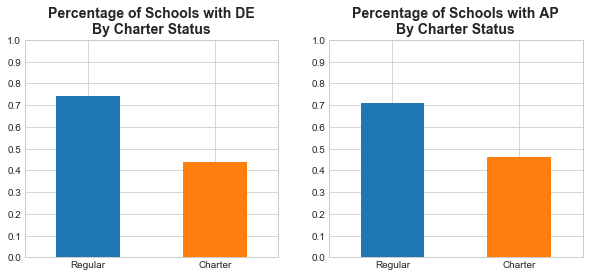

In [44]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (10,4))

plt.sca(ax1)
de_by_charter.plot.bar(x = 'SCH_STATUS_CHARTER', y = 'pct_de', ax=ax1)
plt.legend([])
plt.title('Percentage of Schools with DE\nBy Charter Status')
plt.xticks(rotation = 0)
plt.yticks(np.arange(0,1.1,0.1))
plt.ylim([0,1])
plt.xlabel('')

plt.sca(ax2)
ap_by_charter.plot.bar(x = 'SCH_STATUS_CHARTER', y = 'pct_ap', ax=ax2)
plt.legend([])
plt.title('Percentage of Schools with AP\nBy Charter Status')
plt.xticks(rotation = 0)
plt.yticks(np.arange(0,1.1,0.1))
plt.ylim([0,1])
plt.xlabel('')

# VII. By Title I Eligibility

<div class = 'alert alert-cell alert-danger'>**Filter out all schools with missing values**</div>

In [45]:
hs.TITLEI.value_counts()

Yes               11947
No                 6083
-9                  353
Not Applicable      143
Missing             141
Name: TITLEI, dtype: int64

In [46]:
"""Remove the Misreported/Null Values"""
hs_by_titleI = hs.drop(hs[(hs.TITLEI == 'Missing') | (hs.TITLEI == 'Not Applicable') | (hs.TITLEI == '-9')].index, axis = 0)
hs_by_titleI.TITLEI.value_counts()

Yes    11947
No      6083
Name: TITLEI, dtype: int64

<div class = 'alert alert-cell alert-info'>**DE**</div>

In [47]:
de_by_titleI = hs_by_titleI.groupby(['TITLEI', 'SCH_DUAL_IND'])['LEAID'].count().unstack().reset_index()
de_by_titleI['TITLEI'] = de_by_titleI['TITLEI'].map({'Yes':'Eligible', 'No':'Not Eligible'})
de_by_titleI['Total Schools'] = (de_by_titleI['No'] + de_by_titleI['Yes'])
de_by_titleI['pct_de'] = round(de_by_titleI['Yes'] / (de_by_titleI['No'] + de_by_titleI['Yes']), 2)
de_by_titleI.drop(['No'], axis = 1)

SCH_DUAL_IND,TITLEI,Yes,Total Schools,pct_de
0,Not Eligible,4510,6083,0.74
1,Eligible,8409,11947,0.70


<div class = 'alert alert-cell alert-warning'>**AP**</div>

In [48]:
ap_by_titleI = hs_by_titleI.groupby(['TITLEI', 'SCH_APENR_IND'])['LEAID'].count().unstack().reset_index()
ap_by_titleI['TITLEI'] = ap_by_titleI['TITLEI'].map({'Yes':'Eligible', 'No':'Not Eligible'})
ap_by_titleI['Total Schools'] = (ap_by_titleI['No'] + ap_by_titleI['Yes'])
ap_by_titleI['pct_ap'] = round(ap_by_titleI['Yes'] / (ap_by_titleI['No'] + ap_by_titleI['Yes']), 2)
ap_by_titleI.drop(['No'], axis = 1)

SCH_APENR_IND,TITLEI,Yes,Total Schools,pct_ap
0,Not Eligible,4578,6083,0.75
1,Eligible,7876,11947,0.66


<div class = 'alert alert-cell alert-danger'>**Visualizations**</div>

Text(0.5,0,'')

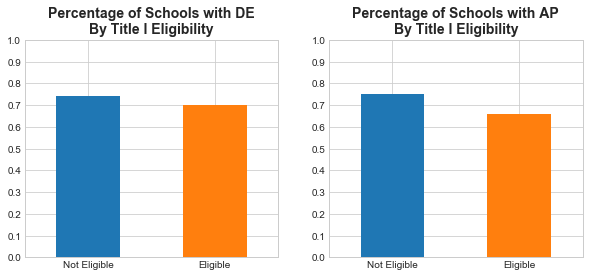

In [49]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,4))

plt.sca(ax1)
de_by_titleI.plot.bar(x = 'TITLEI', y = 'pct_de', ax=ax1)
plt.legend([])
plt.title('Percentage of Schools with DE\nBy Title I Eligibility')
plt.xticks(rotation = 0)
plt.yticks(np.arange(0,1.1,0.1))
plt.ylim([0,1])
plt.xlabel('')

plt.sca(ax2)
ap_by_titleI.plot.bar(x = 'TITLEI', y = 'pct_ap', ax=ax2)
plt.legend([])
plt.title('Percentage of Schools with AP\nBy Title I Eligibility')
plt.xticks(rotation = 0)
plt.yticks(np.arange(0,1.1,0.1))
plt.ylim([0,1])
plt.xlabel('')

# VIII. By Ethnicity Quintiles

<div class = 'alert alert-cell alert-danger'>**Calculate the percent ethnicity of all schools in the set and group schools into quintiles**</div>

In [50]:
hs['pct_eth'] = (hs['total_enrollment'] - hs['SCH_ENR_WH_F'] - hs['SCH_ENR_WH_M']) / hs['total_enrollment']

Text(0.5,0,'Ethnicity Percentage')

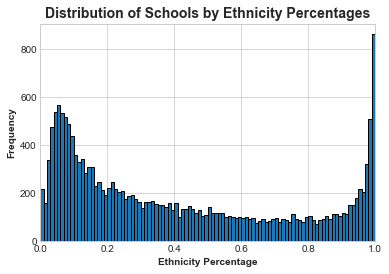

In [51]:
"""What does the distribution of the schools in the dataset look based on ethncitiy?"""
hs.pct_eth.plot.hist(bins=100, xlim = [0,1], edgecolor = 'k')
plt.title('Distribution of Schools by Ethnicity Percentages')
plt.xlabel('Ethnicity Percentage')
# plt.savefig(fname = './Visualizations/By_ethnicity_dist_200.png', dpi = 200)

In [52]:
def eth_grouper(pct):
    if pct <= .20:
        return 1
    elif .20 < pct <= .4:
        return 2
    elif .4 < pct <= 0.6:
        return 3
    elif .6 < pct <= .8:
        return 4
    return 5
    
hs['eth_quintile'] = hs['pct_eth'].apply(lambda pct: eth_grouper(pct))

<div class = 'alert alert-cell alert-info'>**DE**</div>

In [53]:
hs_by_eth_quin = hs.groupby(['eth_quintile', 'SCH_DUAL_IND'])['LEAID'].count().unstack().reset_index()
hs_by_eth_quin['Total Schools'] = (hs_by_eth_quin['No'] + hs_by_eth_quin['Yes'])
hs_by_eth_quin['pct_de'] = round(hs_by_eth_quin['Yes'] / (hs_by_eth_quin['No'] + hs_by_eth_quin['Yes']), 2)
display(hs_by_eth_quin.drop(['No'], axis = 1))
%store hs_by_eth_quin

SCH_DUAL_IND,eth_quintile,Yes,Total Schools,pct_de
0,1,5677,7122,0.80
1,2,2684,3502,0.77
2,3,1755,2414,0.73
3,4,1193,1824,0.65
4,5,2021,3805,0.53


Stored 'hs_by_eth_quin' (DataFrame)


<div class = 'alert alert-cell alert-warning'>**AP**</div>

In [54]:
ap_by_eth_quin = hs.groupby(['eth_quintile', 'SCH_APENR_IND'])['LEAID'].count().unstack().reset_index()
ap_by_eth_quin['Total Schools'] = (ap_by_eth_quin['No'] + ap_by_eth_quin['Yes'])
ap_by_eth_quin['pct_ap'] = round(ap_by_eth_quin['Yes'] / (ap_by_eth_quin['No'] + ap_by_eth_quin['Yes']), 2)
display(ap_by_eth_quin.drop(['No'], axis = 1))
%store ap_by_eth_quin

SCH_APENR_IND,eth_quintile,Yes,Total Schools,pct_ap
0,1,4385,7122,0.62
1,2,2493,3502,0.71
2,3,1828,2414,0.76
3,4,1367,1824,0.75
4,5,2683,3805,0.71


Stored 'ap_by_eth_quin' (DataFrame)


<div class = 'alert alert-cell alert-danger'>**Visualization**</div>

Text(0.5,0,'')

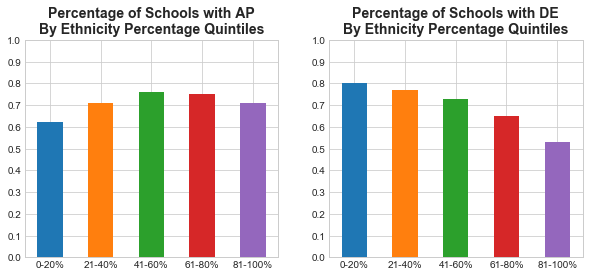

In [55]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,4))
plt.sca(ax1)
ap_by_eth_quin.plot.bar(x = 'eth_quintile', y = 'pct_ap', ax = ax1)
plt.legend([])
plt.title('Percentage of Schools with AP\nBy Ethnicity Percentage Quintiles')
plt.xticks(rotation = 0)
plt.yticks(np.arange(0,1.1,0.1))
plt.ylim([0,1])
plt.xticks([0,1,2,3,4], ['0-20%', '21-40%', '41-60%', '61-80%', '81-100%'])
plt.xlabel('')

plt.sca(ax2)
hs_by_eth_quin.plot.bar(x = 'eth_quintile', y = 'pct_de', ax = ax2)
plt.legend([])
plt.title('Percentage of Schools with DE\nBy Ethnicity Percentage Quintiles')
plt.xticks(rotation = 0)
plt.yticks(np.arange(0,1.1,0.1))
plt.ylim([0,1])
plt.xticks([0,1,2,3,4], ['0-20%', '21-40%', '41-60%', '61-80%', '81-100%'])
plt.xlabel('')

<div class = 'alert alert-cell alert-info'>**Ethnicity Exploration**</div>

In [56]:
"""States with the highest number of 98%+ non-white schools (top 10)"""
hs[hs.pct_eth >= 0.98].groupby('LEA_STATE')['LEAID'].count().sort_values(ascending = False).head(10)

LEA_STATE
NY    224
CA    204
TX    170
IL     80
AK     79
NJ     53
GA     49
PA     44
MS     42
MI     40
Name: LEAID, dtype: int64

In [57]:
"""Very high percentage non-minority schools by Locale"""
eth_group1_locales = hs[hs.eth_quintile == 1].groupby('locale_group')['LEAID'].count().reset_index()
eth_group1_locales['pct'] = round(eth_group1_locales['LEAID'] / eth_group1_locales['LEAID'].sum() * 100, 1)
eth_group1_locales = eth_group1_locales.set_index('locale_group')
eth_group1_locales

,LEAID,pct
locale_group,,
City,168,2.4
Rural,4452,62.5
Suburban,1223,17.2
Town,1279,18.0


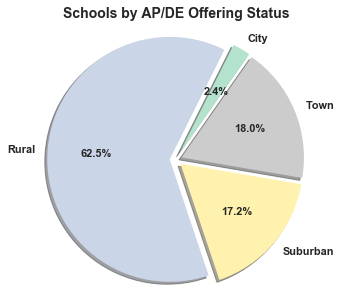

In [58]:
with plt.rc_context({'lines.linewidth': 5, 'font.weight':'bold', 'font.size':11}):
    eth_group1_locales.plot.pie(y='LEAID',autopct='%1.1f%%', 
                            startangle = 55, shadow = True, explode = [.05 for i in range(4)],
                            colormap='Pastel2', figsize = (5,5))
    plt.title('Schools by AP/DE Offering Status')
    plt.legend([])
    plt.ylabel('')
    plt.xticks(fontdict={'fontweight':'bold'})
    plt.axis('equal')

# IX. By Vocational Status

<div class='alert alert-cell alert-info'><b>DE</b></div>

In [59]:
hs_by_voc = hs.groupby(['SCH_TYPE', 'SCH_DUAL_IND'])['LEAID'].count().unstack().reset_index()
hs_by_voc['Total Schools'] = (hs_by_voc['No'] + hs_by_voc['Yes'])
hs_by_voc['pct_de'] = round(hs_by_voc['Yes'] / (hs_by_voc['No'] + hs_by_voc['Yes']), 2)

hs_by_voc['SCH_TYPE'] = hs_by_voc['SCH_TYPE'].astype(str)
hs_by_voc.at[0,'SCH_TYPE'] = 'Regular'
hs_by_voc.at[1,'SCH_TYPE'] = 'Vocational'
hs_by_voc = hs_by_voc.set_index('SCH_TYPE')

display(hs_by_voc.drop(['No'], axis = 1))

SCH_DUAL_IND,Yes,Total Schools,pct_de
SCH_TYPE,,,
Regular,13124,18308,0.72
Vocational,206,359,0.57


<div class='alert alert-cell alert-warning'><b>AP</b></div>

In [60]:
ap_by_voc = hs.groupby(['SCH_TYPE', 'SCH_APENR_IND'])['LEAID'].count().unstack().reset_index()
ap_by_voc['Total Schools'] = (ap_by_voc['No'] + ap_by_voc['Yes'])
ap_by_voc['pct_ap'] = round(ap_by_voc['Yes'] / (ap_by_voc['No'] + ap_by_voc['Yes']), 2)

ap_by_voc['SCH_TYPE'] = ap_by_voc['SCH_TYPE'].astype(str)
ap_by_voc.at[0,'SCH_TYPE'] = 'Regular'
ap_by_voc.at[1,'SCH_TYPE'] = 'Vocational'
ap_by_voc = ap_by_voc.set_index('SCH_TYPE')

display(ap_by_voc.drop(['No'], axis = 1))

SCH_APENR_IND,Yes,Total Schools,pct_ap
SCH_TYPE,,,
Regular,12639,18308,0.69
Vocational,117,359,0.33


<div class = 'alert alert-cell alert-danger'>**Visualizations**</div>

Text(0.5,0,'')

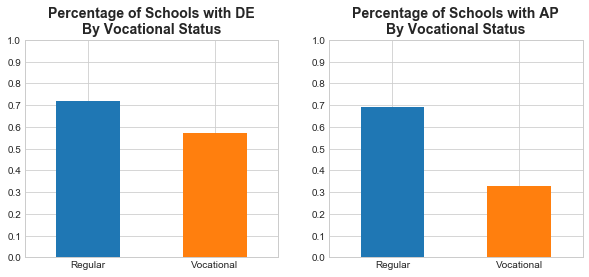

In [61]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,4))
plt.sca(ax1)
hs_by_voc.plot.bar(y = 'pct_de', ax = ax1)
plt.legend([])
plt.title('Percentage of Schools with DE\nBy Vocational Status')
plt.xticks(rotation = 0)
plt.yticks(np.arange(0,1.1,0.1))
plt.ylim([0,1])
plt.xlabel('')

plt.sca(ax2)
ap_by_voc.plot.bar(y = 'pct_ap', ax = ax2)
plt.legend([])
plt.title('Percentage of Schools with AP\nBy Vocational Status')
plt.xticks(rotation = 0)
plt.yticks(np.arange(0,1.1,0.1))
plt.ylim([0,1])
plt.xlabel('')

# X. By (Largest) Districts
How well do the largest districts (chosen by number of schools in the district) in offering DE/AP?

<div class = 'alert alert-cell alert-info'>**DE**</div>

In [62]:
hs_by_district = hs.groupby(['LEAID', 'LEA_NAME', 'LEA_STATE', 'SCH_DUAL_IND'])['LEAID'].count().unstack().reset_index()
hs_by_district = hs_by_district.fillna(0)
hs_by_district[['No', 'Yes']] = hs_by_district[['No', 'Yes']].astype(int)

hs_by_district['Total Schools'] = (hs_by_district['No'] + hs_by_district['Yes'])
hs_by_district['pct_de'] = round(hs_by_district['Yes'] / (hs_by_district['No'] + hs_by_district['Yes']), 2)

In [63]:
"""Top 100 Districts (by number of schools in district) and their DE-Offering Percentages"""
with pd.option_context('display.max_rows', 100):
    display(hs_by_district.drop(['No'], axis = 1).sort_values('Total Schools', ascending = False).reset_index().drop(['index'], axis = 1).head(100))

SCH_DUAL_IND,LEAID,LEA_NAME,LEA_STATE,Yes,Total Schools,pct_de
0,3620580,NEW YORK CITY PUBLIC SCHOOLS,NY,124,460,0.27
1,622710,Los Angeles Unified,CA,66,114,0.58
2,1709930,City of Chicago SD 299,IL,79,112,0.71
3,1200390,DADE,FL,66,81,0.81
4,1500030,Hawaii Department of Education,HI,57,63,0.90
5,3200060,CLARK COUNTY SCHOOL DISTRICT,NV,11,54,0.20
6,4218990,Philadelphia City SD,PA,0,49,0.00
7,1200180,BROWARD,FL,38,46,0.83
8,4823640,HOUSTON ISD,TX,30,45,0.67
9,4700148,Shelby County Schools,TN,24,42,0.57


In [64]:
"""Top 25 Districts at Offering DE"""
hs_by_district.drop(['No'], axis = 1).sort_values(['Total Schools'], ascending = False).reset_index(drop=True).head(100).sort_values('pct_de', ascending = False).reset_index(drop=True).head(25)

SCH_DUAL_IND,LEAID,LEA_NAME,LEA_STATE,Yes,Total Schools,pct_de
0,1301290,Cobb County,GA,16,16,1.00
1,2400120,Baltimore County Public Schools,MD,24,24,1.00
2,1201530,PASCO,FL,14,14,1.00
3,804800,Jefferson County School District No. R-1,CO,28,28,1.00
4,3700011,Cumberland County Schools,NC,14,14,1.00
5,2400480,Montgomery County Public Schools,MD,25,25,1.00
6,2400060,Anne Arundel County Public Schools,MD,13,13,1.00
7,102370,Mobile County,AL,12,12,1.00
8,4818300,EL PASO ISD,TX,12,12,1.00
9,1302280,Fulton County,GA,16,16,1.00


In [65]:
"""Bottom 25 Districts at Offering DE"""
hs_by_district.drop(['No'], axis = 1).sort_values(['Total Schools'], ascending = False).reset_index(drop=True).head(100).sort_values('pct_de').reset_index(drop=True).head(25)

SCH_DUAL_IND,LEAID,LEA_NAME,LEA_STATE,Yes,Total Schools,pct_de
0,06CC366,Green Dot Public Schools,CA,0,11,0.00
1,3904378,Cleveland Metropolitan School District,OH,0,27,0.00
2,2502790,Boston,MA,0,22,0.00
3,619540,Kern High,CA,0,19,0.00
4,4218990,Philadelphia City SD,PA,0,49,0.00
5,200485,Lake and Peninsula Borough School District,AK,0,11,0.00
6,3701620,Gaston County Schools,NC,0,11,0.00
7,3701500,Winston Salem/Forsyth County Schools,NC,0,16,0.00
8,2612000,Detroit City School District,MI,1,18,0.06
9,1100030,District of Columbia Public Schools,DC,1,15,0.07


<div class = 'alert alert-cell alert-warning'>**AP**</div>

In [66]:
ap_by_district = hs.groupby(['LEAID', 'LEA_NAME', 'LEA_STATE', 'SCH_APENR_IND'])['LEAID'].count().unstack().reset_index()
ap_by_district = ap_by_district.fillna(0)
ap_by_district[['No', 'Yes']] = ap_by_district[['No', 'Yes']].astype(int)

ap_by_district['Total Schools'] = (ap_by_district['No'] + ap_by_district['Yes'])
ap_by_district['pct_ap'] = round(ap_by_district['Yes'] / (ap_by_district['No'] + ap_by_district['Yes']), 2)

In [67]:
"""Top 100 Districts (by number of schools in district) and their AP-Offering Percentages"""
with pd.option_context('display.max_rows', 100):
    display(ap_by_district.drop(['No'], axis = 1).sort_values('Total Schools', ascending = False).reset_index().drop(['index'], axis = 1).head(100))

SCH_APENR_IND,LEAID,LEA_NAME,LEA_STATE,Yes,Total Schools,pct_ap
0,3620580,NEW YORK CITY PUBLIC SCHOOLS,NY,314,460,0.68
1,622710,Los Angeles Unified,CA,112,114,0.98
2,1709930,City of Chicago SD 299,IL,104,112,0.93
3,1200390,DADE,FL,78,81,0.96
4,1500030,Hawaii Department of Education,HI,42,63,0.67
5,3200060,CLARK COUNTY SCHOOL DISTRICT,NV,48,54,0.89
6,4218990,Philadelphia City SD,PA,41,49,0.84
7,1200180,BROWARD,FL,42,46,0.91
8,4823640,HOUSTON ISD,TX,44,45,0.98
9,4700148,Shelby County Schools,TN,26,42,0.62


In [68]:
"""Top 25 Districts at Offering AP?"""
ap_by_district.drop(['No'], axis = 1).sort_values(['Total Schools'], ascending = False).reset_index(drop = True).head(100).sort_values('pct_ap', ascending = False).reset_index(drop=True).head(25)

SCH_APENR_IND,LEAID,LEA_NAME,LEA_STATE,Yes,Total Schools,pct_ap
0,1301290,Cobb County,GA,16,16,1.0
1,101920,Jefferson County,AL,12,12,1.0
2,4808940,AUSTIN ISD,TX,12,12,1.0
3,5101260,FAIRFAX CO PBLC SCHS,VA,25,25,1.0
4,2400480,Montgomery County Public Schools,MD,25,25,1.0
5,5102250,LOUDOUN CO PBLC SCHS,VA,15,15,1.0
6,5103840,VA BEACH CITY PBLC SCHS,VA,12,12,1.0
7,2400420,Howard County Public Schools,MD,12,12,1.0
8,1302550,Gwinnett County,GA,20,20,1.0
9,616230,Grossmont Union High,CA,11,11,1.0


In [69]:
"""Bottom 25 Districts at Offering AP?"""
ap_by_district.drop(['No'], axis = 1).sort_values(['Total Schools'], ascending = False).reset_index(drop = True).head(100).sort_values('pct_ap', ascending = True).reset_index(drop=True).head(25)

SCH_APENR_IND,LEAID,LEA_NAME,LEA_STATE,Yes,Total Schools,pct_ap
0,3904378,Cleveland Metropolitan School District,OH,0,27,0.00
1,200485,Lake and Peninsula Borough School District,AK,0,11,0.00
2,200020,Bering Strait School District,AK,0,14,0.00
3,200001,Lower Kuskokwim School District,AK,1,23,0.04
4,200625,Northwest Arctic Borough School District,AK,1,12,0.08
5,900002,Connecticut Technical High School System,CT,2,16,0.12
6,200390,Kenai Peninsula Borough School District,AK,6,18,0.33
7,4701590,Hamilton County,TN,9,21,0.43
8,800020,State Charter School Institute,CO,6,12,0.50
9,901920,HARTFORD SCHOOL DISTRICT,CT,9,17,0.53


<div class = 'alert alert-cell alert-danger'>**Visualizations**</div>

Text(0.5,1,'AP-Offering Percentages of the Top 100 Districts')

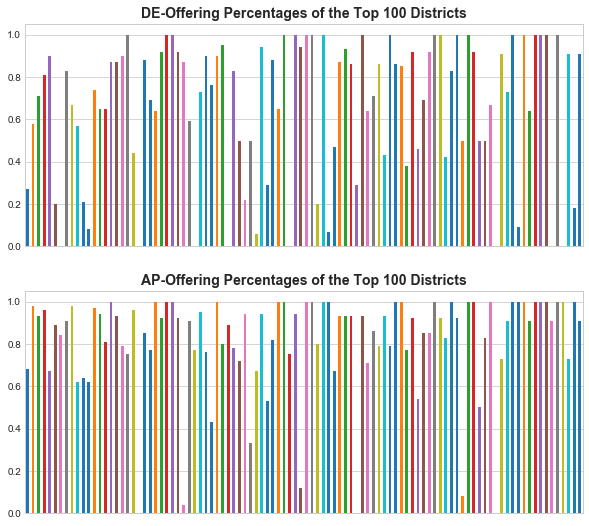

In [70]:
"""Distribution of AP-Offering Percentages sorted by largest to smallest districts (top 100), so left-x-axis have the
largest districts, and right-x-axis have the smallest."""
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(10,9))

plt.sca(ax1)
hs_by_district.drop(['No'], axis = 1).sort_values('Total Schools', ascending = False).reset_index().drop(['index'], axis = 1).head(100)['pct_de'].plot.bar(ax=ax1)
plt.xticks([])
plt.title('DE-Offering Percentages of the Top 100 Districts')

plt.sca(ax2)
ap_by_district.drop(['No'], axis = 1).sort_values('Total Schools', ascending = False).reset_index(drop = True).head(100)['pct_ap'].plot.bar(ax=ax2)
plt.xticks([])
plt.title('AP-Offering Percentages of the Top 100 Districts')

Text(0.5,1,'AP-Offering Percentages of the Top 100 Districts\n(Sorted By AP_PCT)')

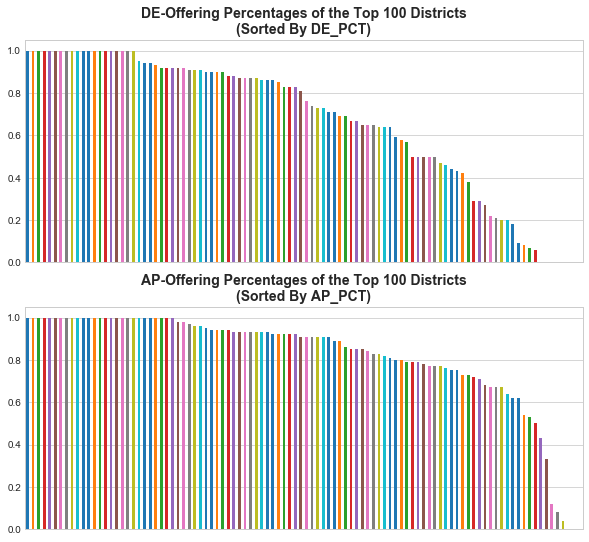

In [71]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize = (10,9))
plt.sca(ax1)
hs_by_district.drop(['No'], axis = 1).sort_values(['Total Schools'], ascending = False).reset_index(drop=True).head(100).sort_values('pct_de', ascending = False)['pct_de'].plot.bar(ax=ax1)
plt.xticks([])
plt.title('DE-Offering Percentages of the Top 100 Districts\n(Sorted By DE_PCT)')

plt.sca(ax2)
ap_by_district.drop(['No'], axis = 1).sort_values('Total Schools', ascending = False).reset_index(drop = True).head(100).sort_values('pct_ap', ascending = False)['pct_ap'].plot.bar(ax=ax2)
plt.xticks([])
plt.title('AP-Offering Percentages of the Top 100 Districts\n(Sorted By AP_PCT)')

# ScatterGeo

In [72]:
de_map = {'Yes':1, 'No':0}
dual_enroll_bin = hs.SCH_DUAL_IND.map(de_map)

In [73]:
# scl = [ [0,"rgb(5, 10, 172)"], [1,"rgb(0, 200, 100)"] ]


# data = [ dict(
#         type = 'scattergeo',
#         locationmode = 'USA-states',
#         lon = hs['LON1516'],
#         lat = hs['LAT1516'],
#         mode = 'markers',
#         marker = dict(
#             size = 5,
#             opacity = 0.8,
#             autocolorscale = False,
#             line = dict(
#                 width=1,
#                 color='rgba(255,255,255,1)'
#             ),
#             colorscale = scl,
#             cmin = 0,
#             color = dual_enroll_bin,
#             cmax = 1,
#         ))]

# layout = dict(
#         geo = dict(
#             scope='usa',
#             projection=dict( type='albers usa' ),
            
#         ),
#     )

# fig = dict( data=data, layout=layout )
# # fig = go.Figure(data = [data], layout = layout)
# iplot(fig, image = 'png', filename = '02_ScatterGeo_DE_1516', image_width = 2750, image_height=2500)

print("To see the scattergeo, uncomment code and change the size of the markers (to 3-5) -- Very cumbersome Graph")